In [10]:
import sys
import subprocess

for module in ["pandas", "seaborn", "matplotlib", "plotly"]:
    try:
        __import__(module)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", module])

In [11]:
# Day 5: Evaluating Visualizations for Usability and Human Factors
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Load Sentiment Analysis Dataset
sentiment_url = "Sentiment Analysis Dataset.csv"
sentiment = pd.read_csv(sentiment_url, encoding="latin1")

sentiment.columns

Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')

In [12]:
sentiment.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [13]:
sentiment['length'] = sentiment['SentimentText'].apply(len)
sentiment.head()

,ItemID,Sentiment,SentimentText,length
0,1,0,is so sad for my APL frie...,61
1,2,0,I missed the New Moon trail...,51
2,3,1,omg its already 7:30 :O,37
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,5,0,i think mi bf is cheating on me!!! ...,53


In [14]:
# Task 1: Create User-Centric Dashboards
positive_reviews = sentiment[sentiment["Sentiment"] == 1]
negative_reviews = sentiment[sentiment["Sentiment"] == 0]
positive_reviews.head()

,ItemID,Sentiment,SentimentText,length
2,3,1,omg its already 7:30 :O,37
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,41
8,9,1,handed in my uniform today . i miss you ...,53
9,10,1,hmmmm.... i wonder how she my number @-),46
11,12,1,thanks to all the haters up in my face a...,61


In [15]:
positive_reviews = positive_reviews.reset_index(drop=True)
negative_reviews = negative_reviews.reset_index(drop=True)

positive_reviews = positive_reviews.head(50)
negative_reviews = negative_reviews.head(50)
positive_reviews.head()

,ItemID,Sentiment,SentimentText,length
0,3,1,omg its already 7:30 :O,37
1,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,41
2,9,1,handed in my uniform today . i miss you ...,53
3,10,1,hmmmm.... i wonder how she my number @-),46
4,12,1,thanks to all the haters up in my face a...,61


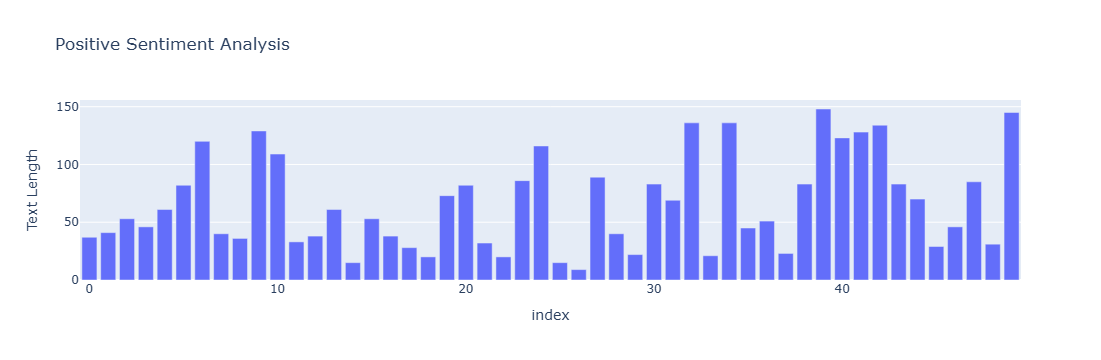

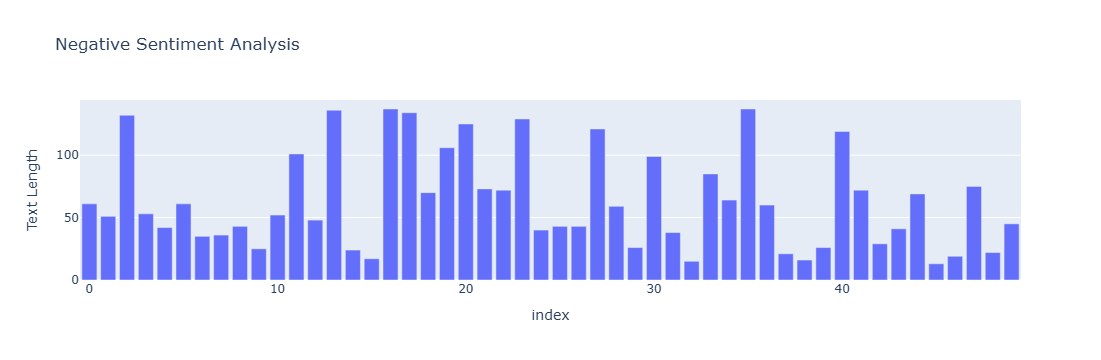

In [17]:
# Positive Sentiment Dashboard
fig_positive = px.bar(
    positive_reviews,
    x=positive_reviews.index,
    y="length",
    title="Positive Sentiment Analysis",
    labels={"x": "Index", "length": "Text Length"}
)
fig_positive.show()

# Negative Sentiment Dashboard
fig_negative = px.bar(
    negative_reviews,
    x=negative_reviews.index,
    y="length",
    title="Negative Sentiment Analysis",
    labels={"x": "Index", "length": "Text Length"}
)
fig_negative.show()

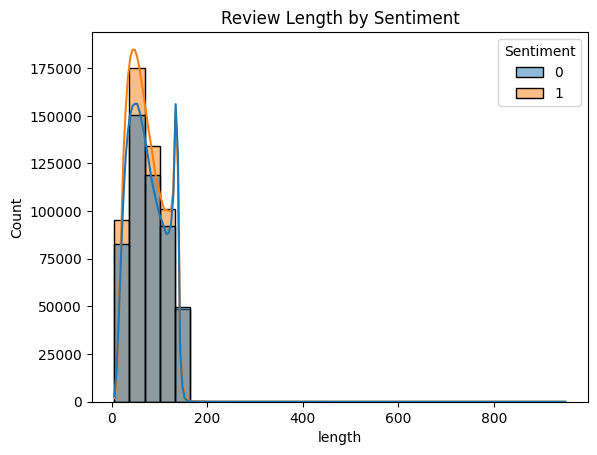

In [18]:
# Task 2: Evaluate Usability
sns.histplot(sentiment, x="length", hue="Sentiment", kde=True, bins=30)
plt.title("Review Length by Sentiment")
plt.show()